# Data Inspection And Data Cleaning 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\user\Desktop\Bank Churn\train.csv")

In [6]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
df.columns = df.columns.str.lower() #converting the strings to lowercase

In [8]:
len(df) #checking the length of the dataset
print('The number of rows in the dataframe:', len(df))

The number of rows in the dataframe: 165034


In [9]:
df.shape # checking the shape of the dataframe
print('The number of rows and columns on the dataframe respectively:', df.shape)

The number of rows and columns on the dataframe respectively: (165034, 14)


In [10]:
# Identifying the structure and datatype of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   customerid       165034 non-null  int64  
 2   surname          165034 non-null  object 
 3   creditscore      165034 non-null  int64  
 4   geography        165034 non-null  object 
 5   gender           165034 non-null  object 
 6   age              165034 non-null  float64
 7   tenure           165034 non-null  int64  
 8   balance          165034 non-null  float64
 9   numofproducts    165034 non-null  int64  
 10  hascrcard        165034 non-null  float64
 11  isactivemember   165034 non-null  float64
 12  estimatedsalary  165034 non-null  float64
 13  exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
None


In [11]:
num_columns = df.select_dtypes(include=['int','float']) # Numeric coluns in the dataframe
cat_columns = df.select_dtypes(include=['O']) # Categorical columns in the dataframe

In [12]:
df.describe().T # statistical summary of the dataframe

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
customerid,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
creditscore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
numofproducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
hascrcard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
isactivemember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
estimatedsalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [13]:
df['age'] = df['age'].astype(int) # converting the age columns from float to integer datatype
df['id'] = df['id'].astype('O') # converting the id column from integer to object

In [14]:
# Identifying the number of customer who churned
df['exited'] = df['exited'].replace({1:'churned',0:'Not Churned'})
print('The value count of customers who churned and who did not churn')
exited_value_count = df['exited'].value_counts()
print(exited_value_count)

The value count of customers who churned and who did not churn
exited
Not Churned    130113
churned         34921
Name: count, dtype: int64


<Axes: title={'center': 'Value Count of Customer who exited and stayed'}, ylabel='exited'>

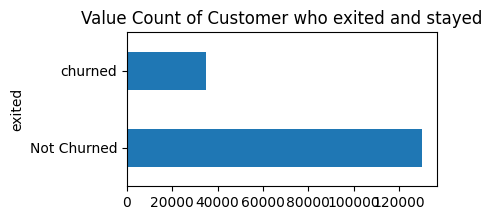

In [15]:
exited_value_count.plot(kind='barh',title='Value Count of Customer who exited and stayed',figsize=(4,2))

# Data Inspection and Cleaning Process:

## Data Loading:
Loaded the dataset using the pandas read_csv() function.

## Column Names Standardization:
Standardized column names to lowercase using the columns.str.lower() method to ensure consistency and ease of access.

## Dataset Overview:
Checked the length of the dataset using the len() function to determine the number of rows.
Checked the shape of the dataset using the shape attribute to ascertain the number of rows and columns.

## Data Information:
- Printed the information about the dataset using the info() method to obtain an overview of the data types and non-null counts for each column.
- Numeric and Categorical Columns Separation:
- Separated numeric and categorical columns using the select_dtypes() method with appropriate data type filters (include=['int','float'] for numeric and include=['O'] for categorical).

## Statistical Summary:
Generated a statistical summary of the numeric columns using the describe() method to understand the distribution and central tendency of the numerical features.

## Data Type Conversion:
- Converted the 'age' column from float to integer data type using the astype() method to ensure consistency and eliminate decimal points.
- Converted the 'id' column from integer to object data type using the astype() method to treat it as a categorical variable rather than a numerical identifier.
- Target Variable Transformation:
- Replaced numerical values in the 'exited' column with categorical labels ('churned' and 'Not Churned') using the replace() method for better interpretability.

## Data Quality Check:
- Conducted a value count of the 'exited' column to inspect the distribution of churned and not churned customers to ensure data quality and understand class imbalance.

## Visualization:
- Visualized the value count of churned and not churned customers using a horizontal bar chart with the plot() method to provide a clear understanding of the distribution.



# Exploratory Data Analysis 

In [16]:
df['isactivemember'] = df.isactivemember.replace({1.0:'Active', 0.0:'Not Active'})
churned_active_users = df[df['exited']=='churned'].groupby('isactivemember').size()
print('The number of Active and Inactive Users:')
print(churned_active_users)

The number of Active and Inactive Users:
isactivemember
Active        10297
Not Active    24624
dtype: int64


<Axes: title={'center': 'Active and Inactive Users who Churned'}, xlabel='isactivemember'>

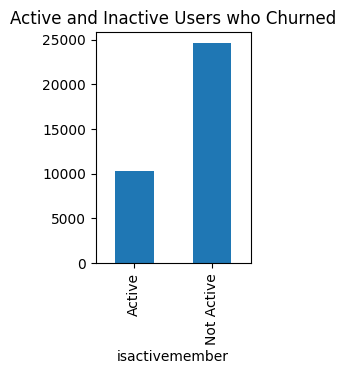

In [17]:
churned_active_users.plot(kind='bar',title='Active and Inactive Users who Churned',figsize=(2,3))

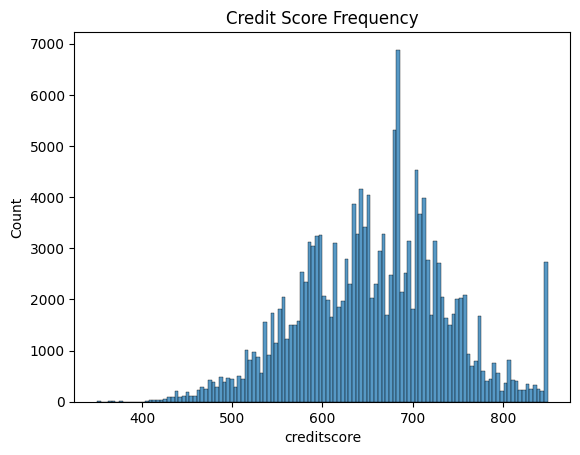

In [18]:
sns.histplot(df['creditscore'])
plt.title('Credit Score Frequency')
plt.show()

In [19]:
churned_users_by_geography = df[df['exited']=='churned'].groupby('geography').size()
print('The number of Churned Customers by Geography')
print(churned_users_by_geography)

The number of Churned Customers by Geography
geography
France     15572
Germany    13114
Spain       6235
dtype: int64


<Axes: title={'center': 'Churned Customers by Geography'}, xlabel='geography'>

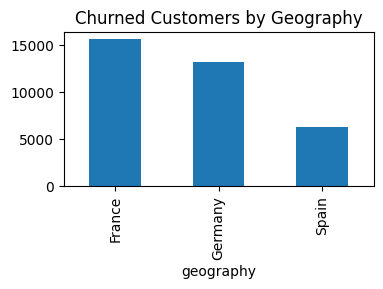

In [20]:
churned_users_by_geography.plot(kind='bar', title='Churned Customers by Geography',figsize=(4,2))

In [21]:
churned_users_by_gender = df[df['exited']=='churned'].groupby('gender').size()
print('The number of Churned Customers by gender')
print(churned_users_by_gender)

The number of Churned Customers by gender
gender
Female    20105
Male      14816
dtype: int64


<Axes: title={'center': 'Churned Customers by Gender'}, xlabel='gender'>

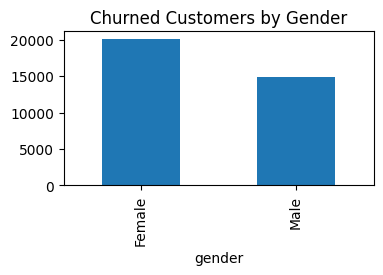

In [22]:
churned_users_by_gender.plot(kind='bar', title='Churned Customers by Gender',figsize=(4,2))

In [23]:
creditscore_frequency = df[df['exited']=='churned']['creditscore'].value_counts().sort_values(ascending=False)
print('The Frequency of top 10 Credit Score of Churned Users:')
top_10_creditscore = creditscore_frequency.head(10).copy()
print(top_10_creditscore)

The Frequency of top 10 Credit Score of Churned Users:
creditscore
678    478
850    470
705    362
648    335
651    320
684    314
652    292
682    291
683    290
637    288
Name: count, dtype: int64


<Axes: title={'center': 'Frequency of churned customers creditscore'}, ylabel='Frequency'>

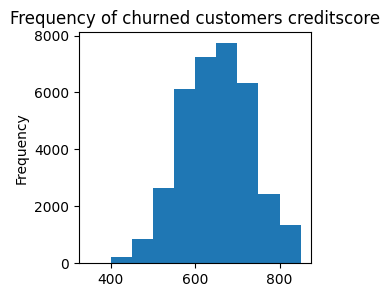

In [24]:
df[df['exited']=='churned']['creditscore'].plot(kind='hist',title='Frequency of churned customers creditscore',figsize=(3,3))

In [25]:
balance_frequency = df[df['exited']=='churned']['balance'].value_counts().sort_values(ascending=False)
print('The Frequency of top 10 Credit Score of Churned Users:')
top_10_balance = balance_frequency.head(10).copy()
print(top_10_balance)

The Frequency of top 10 Credit Score of Churned Users:
balance
0.00         14492
124577.33       27
122314.50       24
102773.20       22
129855.32       20
127864.40       19
139973.65       16
113657.83       16
122453.97       15
126473.33       15
Name: count, dtype: int64


<Axes: title={'center': 'Frequency of churned customers balance'}, ylabel='Frequency'>

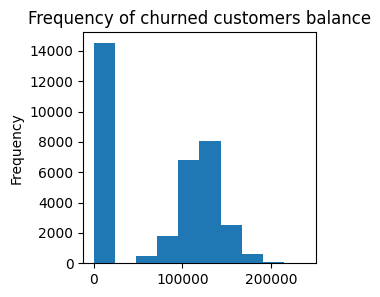

In [26]:
df[df['exited']=='churned']['balance'].plot(kind='hist',title='Frequency of churned customers balance',figsize=(3,3))

In [27]:
age_frequency = df[df['exited']=='churned']['age'].value_counts().sort_values(ascending=False)
print('The Frequency of top 10 Age of Churned Users:')
print(age_frequency.head(10))

The Frequency of top 10 Age of Churned Users:
age
46    1846
43    1797
40    1723
45    1592
48    1421
47    1384
44    1382
39    1365
41    1355
42    1334
Name: count, dtype: int64


<Axes: title={'center': 'Frequency of churned customers age'}, ylabel='Frequency'>

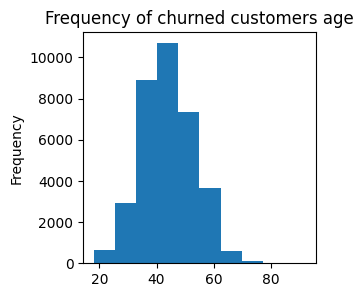

In [28]:
df[df['exited']=='churned']['age'].plot(kind='hist',title='Frequency of churned customers age',figsize=(3,3))

In [29]:
salary_frequency = df[df['exited']=='churned']['estimatedsalary'].value_counts().sort_values(ascending=False)
print('The Frequency of top 10 Estimated Salary of Churned Users:')
print(salary_frequency.head(10))

The Frequency of top 10 Estimated Salary of Churned Users:
estimatedsalary
16081.62     28
88890.05     27
140941.47    25
90876.95     25
181224.56    24
121151.10    22
138526.96    21
141872.05    21
173498.45    20
147055.87    20
Name: count, dtype: int64


<Axes: title={'center': 'Frequency of churned customers Estimated salary'}, ylabel='Frequency'>

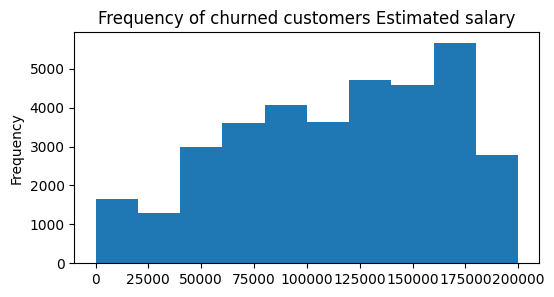

In [30]:
df[df['exited']=='churned']['estimatedsalary'].plot(kind='hist',title='Frequency of churned customers Estimated salary',figsize=(6,3))

In [31]:
tenure_frequency = df[df['exited']=='churned']['tenure'].value_counts().sort_values(ascending=False)
print('The Frequency of top 10 Tenure of Churned Users:')
print(tenure_frequency.head(10))

The Frequency of top 10 Tenure of Churned Users:
tenure
4    3974
3    3810
5    3800
1    3790
9    3544
2    3516
8    3468
7    3341
6    3145
0    1276
Name: count, dtype: int64


<Axes: title={'center': 'Frequency of churned customers tenure'}, ylabel='Frequency'>

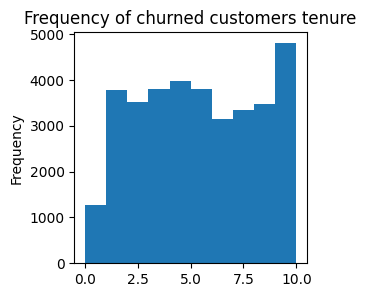

In [32]:
df[df['exited']=='churned']['tenure'].plot(kind='hist',title='Frequency of churned customers tenure',figsize=(3,3))

In [33]:
numofproducts_frequency = df[df['exited']=='churned']['numofproducts'].value_counts().sort_values(ascending=False)
print('The Frequency of Number of Products of Churned Users:')
print(numofproducts_frequency.head(10))

The Frequency of Number of Products of Churned Users:
numofproducts
1    26858
2     5093
3     2554
4      416
Name: count, dtype: int64


<Axes: title={'center': 'Frequency of churned customers Number of Products'}, ylabel='Frequency'>

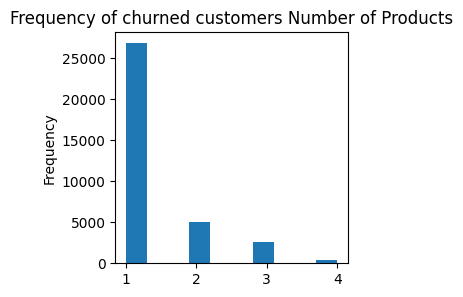

In [34]:
df[df['exited']=='churned']['numofproducts'].plot(kind='hist',title='Frequency of churned customers Number of Products',figsize=(3,3))

# Exploratory Analysis of Churned Customers

This report provides a comprehensive analysis of customers who have churned from the service, considering demographic, financial, geographical, and activity-related factors. The aim is to identify significant characteristics and behaviors of churned users and provide recommendations to improve user retention.

## Demographics:

- Age Distribution: Churned users are predominantly between the ages of 40 to 46, with 46 being the most common age.
- Gender Distribution: Analysis reveals varying churn rates between genders. Among churned users, 20,105 are female, while 14,816 are male.
- Tenure: Users with tenures of 3 to 5 years exhibit higher churn rates, particularly at the 4-year mark.

## Financial Information:
- Balance: A significant proportion of churned users maintain a balance of 0, indicating low engagement or activity.
- Credit Score: Credit scores among churned users range from 637 to 850, with 678 and 850 being the most frequent.

## Product Usage:
- Number of Products: Churned users primarily utilize a single product, with a smaller segment utilizing two or three products.

## Activity Status:
- Active vs. Inactive Users: Churned users comprise both active and inactive members. Active users represent 10,297 while inactive users represent 24,624.

## Geographical Analysis:
-Location: Churn rates vary across regions, indicating regional factors influencing customer behavior and retention. In France 15572 churned, in Germany 13114 churned and in Spain 6235 users churned.




# Recommendations to Retain Users:

1. Localized Marketing Campaigns:
Develop region-specific marketing strategies tailored to address unique needs identified through geographical analysis.
Utilize localized events or cultural insights to create targeted campaigns aimed at retaining users in high-churn regions.

2. Personalized Engagement:
Implement personalized incentives or loyalty rewards based on demographic, financial, and activity-related characteristics to encourage user retention.
Offer tailored financial management tools or advisory services to users with low balances or credit scores to enhance engagement with the service.

3. Product Optimization:
Analyze usage patterns of users with multiple products and customize offerings to better meet their needs and preferences.
Conduct user surveys to gather feedback and identify areas for product improvement or feature development.

4. Community Engagement Initiatives:
Foster a sense of community among users through localized events, forums, or online communities, particularly in regions with high churn rates.
Encourage user participation and feedback to better understand regional challenges and adapt retention strategies accordingly.

5. Continuous Monitoring and Adaptation:
Regularly monitor churn metrics and conduct ongoing analysis to identify changing trends or patterns.
Maintain open communication channels with users to address concerns promptly and demonstrate a commitment to customer satisfaction.

6. Localized Customer Support:
Establish dedicated customer support teams or resources for users in high-churn regions to provide personalized assistance and address issues effectively.

# Machine Learning

# Task
- Build analgorithm that will successfully predict customers retaintion

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import f_regression, chi2, SelectKBest

In [36]:
df['exited'] = df.exited.replace({'churned':1, 'Not Churned':0})

In [37]:
x = df.drop(['exited','id','customerid','surname'],axis=1)
y = df.exited

In [38]:
sampler = RandomUnderSampler()

In [39]:
sampled_x, sampled_y = sampler.fit_resample(x,y)

In [40]:
sampled_y.value_counts()

exited
0    34921
1    34921
Name: count, dtype: int64

In [41]:
len(sampled_x), len(sampled_y)

(69842, 69842)

In [98]:
num_columns = sampled_x.select_dtypes(include=['int','float'])
cat_columns = sampled_x.select_dtypes(include=['O'])

In [99]:
num_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_regression, k=4))
])

In [100]:
cat_pipe = Pipeline([
    ('scaler', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('selector', SelectKBest(chi2, k=2))
])

In [101]:
processor = ColumnTransformer(
    transformers=[
        ('pipe1', num_pipe, num_columns.columns),
        ('pipe2', cat_pipe, cat_columns.columns)
    ],
        remainder='passthrough'
)

In [102]:
x_train,x_test,y_train,y_test = train_test_split(sampled_x,sampled_y, test_size=0.3,random_state=50)

In [103]:
x_train.shape, y_train.shape

((48889, 10), (48889,))

In [104]:
# RandomForest Model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [105]:
rf_model = make_pipeline(processor,rf).fit(x_train,y_train)

In [106]:
from sklearn.metrics import f1_score, confusion_matrix

In [107]:
rf_predict = rf_model.predict(x_test)

In [70]:
f1_score(y_test,rf_predict)

0.7650384113639658

In [72]:
confusion_matrix(y_test,rf_predict)

array([[8173, 2345],
       [2518, 7917]], dtype=int64)